In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

import seaborn as sns

from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
wine = pd.read_csv("../data/wine.csv", header=None)
wine.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
20,1,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
85,2,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450
58,1,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
27,1,13.30,1.72,2.14,17.0,94,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285
100,2,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710
152,3,13.11,1.90,2.75,25.5,116,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425
145,3,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
139,3,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590


In [3]:
names = """Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,
Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,
Color intensity,Hue,OD280/OD315 of diluted wines,Proline""".replace("\n", "").split(",")

In [4]:
wine.columns = names

In [5]:
wine.sample(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
132,3,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560
117,2,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345
124,2,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380
54,1,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060
145,3,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
29,1,14.02,1.68,2.21,16.0,96,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035
126,2,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
67,2,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510


In [6]:
X = wine.iloc[:, 1:]
y = wine["Class"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

In [12]:
forest = RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [16]:
pd.DataFrame({"importance": forest.feature_importances_, "feature": X.columns}).sort_values("importance")

,feature,importance
7,Nonflavanoid phenols,0.006000
8,Proanthocyanins,0.008886
10,Hue,0.015833
2,Ash,0.024603
3,Alcalinity of ash,0.026828
4,Magnesium,0.034400
1,Malic acid,0.041531
9,Color intensity,0.078950
11,OD280/OD315 of diluted wines,0.084164
5,Total phenols,0.087602


In [13]:
forest.score(X_test, y_test)

0.97777777777777775

In [11]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.93333333333333335

In [12]:
pd.DataFrame({"importance": tree.feature_importances_,
              "feature": X.columns}).sort_values("importance")

,feature,importance
0,Alcohol,0.000000
1,Malic acid,0.000000
3,Alcalinity of ash,0.000000
4,Magnesium,0.000000
5,Total phenols,0.000000
7,Nonflavanoid phenols,0.000000
8,Proanthocyanins,0.000000
10,Hue,0.000000
11,OD280/OD315 of diluted wines,0.000000
2,Ash,0.022376


In [21]:
X_train.shape

(133, 13)

In [32]:
ss = StandardScaler()

In [33]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(ss.fit_transform(X_train))
X_test_pca = pca.transform(ss.transform(X_test))
X_train_pca.shape, X_test_pca.shape

((133, 2), (45, 2))

In [9]:
pca.explained_variance_ratio_

array([ 0.9983405 ,  0.00150251])

In [23]:
forest.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [24]:
forest.score(pca.transform(X_test), y_test)

0.66666666666666663

In [16]:
tree.fit(X_train_pca, y_train)
tree.score(pca.transform(X_test), y_test)

0.75555555555555554

KeyboardInterrupt: 

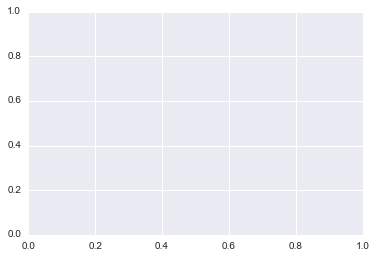

In [18]:
X_pca = np.vstack([X_train_pca, pca.transform(X_test)])
y1 = np.concatenate([y_train, y_test])
plot_decision_regions(X_pca, y1, tree)

KeyboardInterrupt: 

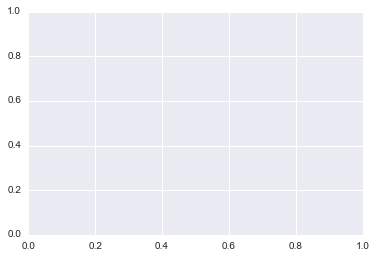

In [19]:
plot_decision_regions(X_train_pca, y_train, tree)

In [34]:
lr = LogisticRegression(random_state=100)
lr.fit(X_train_pca, y_train)
lr.score(pca.transform(X_test), y_test)

0.37777777777777777

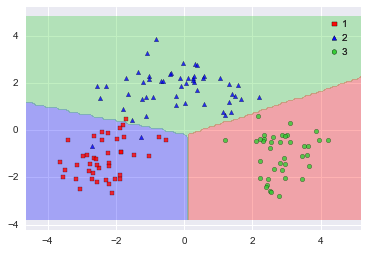

In [35]:
plot_decision_regions(X_train_pca, y_train, lr, res=0.1)

Training accuracy:  0.954887218045 Test Accuracy 0.888888888889


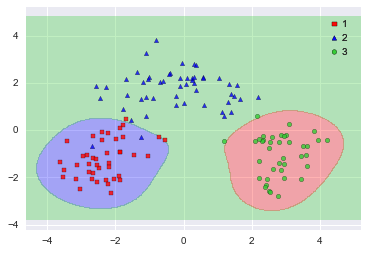

In [45]:
from sklearn.svm import SVC

svc = SVC(C=0.1, gamma=1, kernel="rbf", max_iter=10000, random_state=100, tol=1e-4)
svc.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, svc)
print("Training accuracy: ", svc.score(X_train_pca, y_train),
      "Test Accuracy", svc.score(X_test_pca, y_test))